# Исследование объявлений о продаже квартир

Для анализа имеется архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Основная задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
#Импортируем библиотеки
import pandas as pd

In [2]:
#Откроем файл real_estate_data.csv
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
#Выведем первые 5 строк анализируемой таблицы
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
#Рассмотрм основную информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

На данный момент в таблице 23699 строк. 
По полученной информации можно сказать

- is_apartment нужно преобразовать в тип bool, так как по нему отражена информация яляется ли недвижимость апартаментами
- floors_total нужно преобразовать в int64
- balcony нужно преобразовать в int64
- parks_around3000 нужно преобразовать в тип int64
- ponds_around3000 нужно преобразовать в тип int64
- days_exposition нужно преобразовать в тип int64, так как количество не может быть вещественным типом данных

In [5]:
#Рассмотрим графы таблицы
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Расшифровка наименований граф

0)   total_images -         всего изображений (фото)

1)   last_price -           последняя цена

2)  total_area -           общая площадь

3)   first_day_exposition - день выставления на продажу

4)   rooms -                количество комнат

5)   ceiling_height -       высота потолка

6)   floors_total -         количество этажей

7)   living_area -          жилая площадь 

8)   floor -                этаж

9)  is_apartment -         апартаменты

10)  studio -               студия  

11)  open_plan -            свободная планировка

12)  kitchen_area -         площадь кухни

13)  balcony -              число балконов

14)  locality_name -        где находится 

15)  airports_nearest -     ближайший аэропорт (м)

16)  cityCenters_nearest -  расстояние до центра (м)

17)  parks_around3000 -     количество парков рядом (в пределах 3000м)

18)  parks_nearest -        расстояние до парка (м)

19)  ponds_around3000 -    количество озер/прудов рядом (в пределах 3000м)

20)  ponds_nearest -        расстояние до озера/пруда (м)

21)  days_exposition -      сколько дней висит объявление


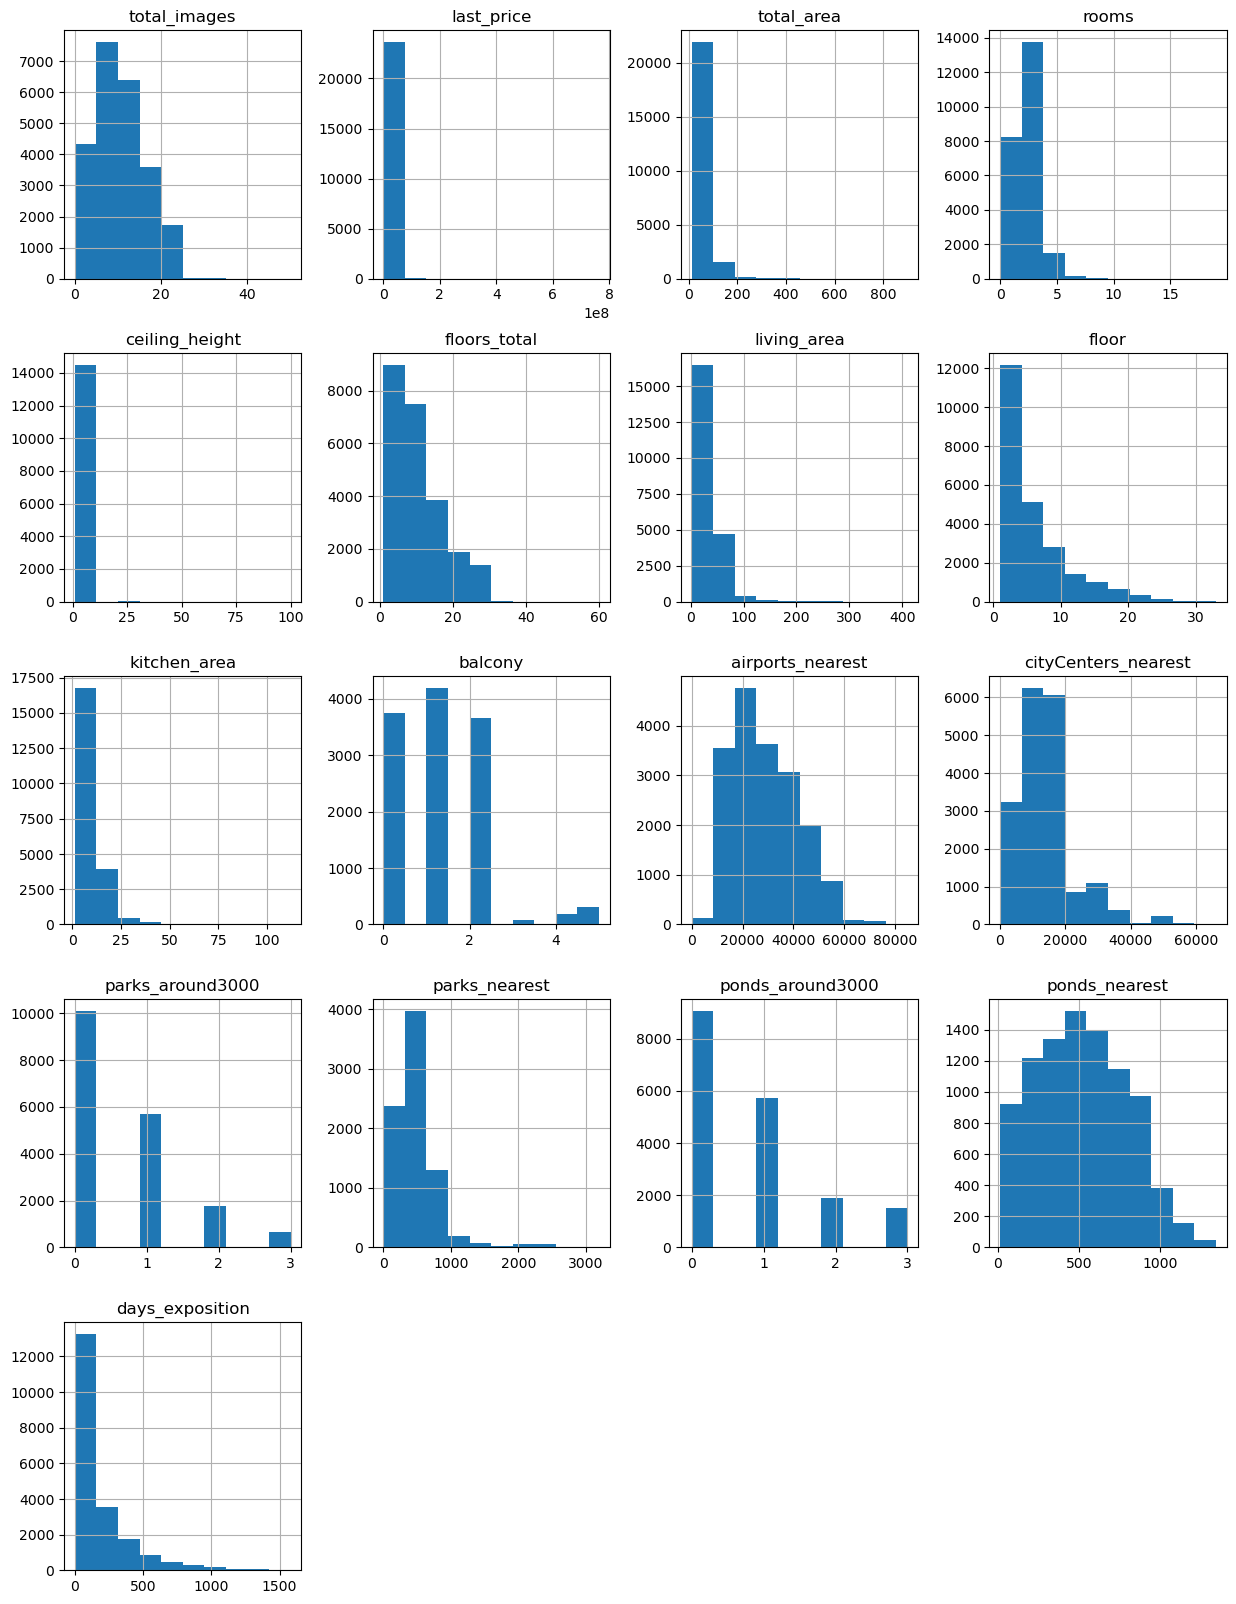

In [6]:
#Построим гистограммы для всех столбцов
data.hist(figsize=(15, 20));

### Предобработка данных

#### Общие сведения

In [7]:
#Переименуем графы в соответствии с правилами
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}) 

In [8]:
#Рассмотрим общее количество пропусков по таблице в целом
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Удаление дубликатов

In [9]:
#Проверим таблицу на наличие дубликатов на начальном этапе
data.duplicated().sum()

0

Рассмотрим значения граф на наличие аномалий и дубликатов, ниже представлены данные по графам, где были обнаружны аномалии или дубликаты.

In [10]:
#Рассмотрим уникальные значения графы ceiling_height
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В значениях присутствуют неправдоподобные данные, такие как 25.0, 32.0, 27.0, 24.0, 26.0, 14.0, 20.0, 22.6, 27.5, 100.0 метров.

In [11]:
#Заменим аномалии на предполагаемы значения
data = data.replace({'ceiling_height':
                     {25.:2.5, 32.:3.2, 27.:2.7, 
                      24.:2.4, 26.:2.6, 14.:1.4, 
                      20.:2.0, 22.6:2.26, 27.5:2.75, 
                      100.:10.0}})

In [12]:
#Проверим данные после замены
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [13]:
#Рассмотрим значения столбца locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

При рассмотрении значений были выявлены неявные дубликаты, такие как поселок/посёлок и другие.

In [14]:
#Рассмотрим изначальное количество значений по каждому населенному пункту
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [15]:
#Проведем замену найденных дубликатов
data['locality_name'] = (
    data['locality_name'].str.replace('поселок', 'посёлок')
)
data['locality_name'] = (
    data['locality_name'].str.replace('городской посёлок', 
                                      'посёлок городского типа')
)
data['locality_name'] = (
    data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 
                                      'садовое товарищество')
)
data['locality_name'] = (
    data['locality_name'].str.replace('посёлок при железнодорожной станции', 
                                      'посёлок станции')
)
data['locality_name'] = (
    data['locality_name'].str.replace('посёлок при железнодорожной станции',
                                      'посёлок')
)
data['locality_name'] = (
    data['locality_name'].str.replace('посёлок станции', 'посёлок')
)
data['locality_name'] = (
    data['locality_name'].str.replace('коттеджный посёлок', 'посёлок')
)

In [16]:
#Проведем замену найденных дубликатов в процессе анализа пропущенных значенй
data['locality_name'] = (
    data['locality_name'].str.replace('посёлок Мурино', 'Мурино')
)
data['locality_name'] = (
    data['locality_name'].str.replace('село Никольское', 'Никольское')
)
data['locality_name'] = (
    data['locality_name'].str.replace('деревня Рабитицы', 'посёлок Рабитицы')
)

In [17]:
#Выведем результат
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары',
       'посёлок городского типа Янино-1', 'посёлок Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'деревня Кудрово',
       'Коммунар', 'Колпино', 'посёлок городского типа Красный Бор',
       'Гатчина', 'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет',

In [18]:
#Проверим количесто значений по каждому населенному пункту после проведенных изменений
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
Мурино                 590
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Количество населенных пунктов увеличилось, за счет переименовывания дубликатов.
Например:
1. до посёлок Мурино         522
2. после Мурино                 590

Проанализируем, возможно ли избавиться от пропусков: необходимо на их место прописать значение или удалить эти строки целиком.

Графы floors_total(86), locality_name(49) содержат пропуски, которые невозможно логически заполнить. Количество данных пропусков составляет менее 1%, поэтому строки без данных по этим графам можно удалить, на общую статистику данное действие не будет иметь существенного влияния.

In [19]:
#Удалим строки с пропусками в данных по графам floors_total, locality_name и 
#переведем столбец floors_total к целочисленному типу данных 
data = data.dropna(subset=['floors_total', 'locality_name']) 
data['floors_total'] = data['floors_total'].astype('int')
data = data.reset_index(drop=True)

#### Преобразование is_apartment и balcony

Будем считать, что отсутствие значений в графах is_apartment и balcony означает, что данные просто оставили пустыми, так как подразумевалось отсутствие информации. Поэтому на место пустых значений можно поставить 0.

In [20]:
#Заменим пустые значения в графах is_apartment и balcony на 0,
#также преобразуем is_apartment к типу bool
#balcony к типу int
data['is_apartment'] = data['is_apartment'].fillna(value=0)
data['balcony'] = data['balcony'].fillna(value=0)

data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')

Мы преобразовали is_apartment к булевому типу данных, так как в данной графе указано или Да, или Нет, то есть является ли квартира апартаментами, других вариаций ответа в графе быть не может.
Также количество балконом не может быть вещественным типом данных.

In [21]:
#Проверим в каких графах остались еще пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### Преобразование ceiling_height

В графе ceiling_height имеются пропуски, заполним их медианным значением по этому населенному пункту.

In [22]:
#Выведем медианные значения по высоте потолков по населенным пунктам 
data_pivot_hight = (
    data
    .pivot_table(index=(data[~data['ceiling_height'].isna()]['locality_name']), values='ceiling_height', aggfunc='median')
    .reset_index()
)
display(data_pivot_hight.head(10))

,locality_name,ceiling_height
0,Бокситогорск,3.90
1,Волосово,2.50
2,Волхов,2.58
3,Всеволожск,2.70
4,Выборг,2.55
5,Высоцк,2.50
6,Гатчина,2.55
7,Зеленогорск,2.55
8,Ивангород,2.52
9,Каменногорск,2.60


In [23]:
#Сопоставим значения по всем строкам
ceiling_height = data.merge(data_pivot_hight, on='locality_name', how='left')

In [24]:
#Запишем полученные значения в пустые ячейки
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height['ceiling_height_y'])

In [25]:
#Проверим есть ли данные по которым не определена медиана
data[data['ceiling_height'].isna()]['locality_name'].value_counts()

посёлок Кобринское            6
посёлок Селезнёво             5
посёлок Усть-Луга             5
село Рождествено              3
деревня Заклинье              3
                             ..
посёлок Форт Красная Горка    1
деревня Курковицы             1
деревня Реброво               1
посёлок Семиозерье            1
деревня Тихковицы             1
Name: locality_name, Length: 67, dtype: int64

In [26]:
#Для населенных пунктов, где не была определена 
#медиана из-за отсутствия данных запишем данные по санпину
data['ceiling_height'] = data['ceiling_height'].fillna(2.50)
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Преобразование kitchen_area

In [27]:
#Выведем медианные значения по площади кухни в зависимлсти от населенного пункта 
data_pivot_kitchen_area = (
    data
    .pivot_table(index=(data[~data['kitchen_area'].isna()]['locality_name']), values=['kitchen_area','total_area'], aggfunc='mean')
    .reset_index()
)
display(data_pivot_kitchen_area)

,locality_name,kitchen_area,total_area
0,Бокситогорск,6.909091,48.018182
1,Волосово,7.777429,49.761429
2,Волхов,7.381237,49.620619
3,Всеволожск,10.374678,56.072829
4,Выборг,8.949055,56.907761
...,...,...,...
293,село Путилово,7.850000,50.800000
294,село Рождествено,8.150000,46.600000
295,село Русско-Высоцкое,10.587500,50.050000
296,село Старая Ладога,6.000000,30.000000


In [28]:
#Расситаем соотношение площадей (соотношение площади кухни к общей) по населенному пункту
data_pivot_kitchen_area['relation'] = data_pivot_kitchen_area['kitchen_area'] / data_pivot_kitchen_area['total_area']

In [29]:
#Сопоставим значения
kitchen_area = data.merge(data_pivot_kitchen_area, on='locality_name', how='left')

In [30]:
#Запишем полученные значения в пустые ячейки
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area['relation'] * data['total_area'])

In [31]:
#Проверим наличие пропусков
data[data['kitchen_area'].isna()]['locality_name'].value_counts()

деревня Тарасово                      2
посёлок Севастьяново                  1
посёлок Красносельское                1
деревня Русско                        1
деревня Трубников Бор                 1
посёлок городского типа Свирьстрой    1
деревня Раздолье                      1
посёлок Плоское                       1
деревня Вахнова Кара                  1
посёлок Лужайка                       1
деревня Иссад                         1
посёлок Счастье                       1
деревня Хязельки                      1
посёлок Левашово                      1
деревня Лаврики                       1
посёлок Петро-Славянка                1
посёлок Корнево                       1
посёлок Пчевжа                        1
Name: locality_name, dtype: int64

In [32]:
#Для данных населенных пунктов нет среднего, так как нет данных
#присвоим им среднее соотношение кухни к общей площади 
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area['relation'].mean())

In [33]:
#Проверим наличие пропусков
data[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Преобразование living_area

In [34]:
#Выведем медианные значения по жилой площади в зависимлсти от населенного пункта 
data_pivot_living_area = (
    data
    .pivot_table(index=(data[~data['living_area'].isna()]['locality_name']), values='living_area', aggfunc='mean')
    .reset_index()
)
display(data_pivot_living_area)

,locality_name,living_area
0,Бокситогорск,31.940000
1,Волосово,28.332857
2,Волхов,31.930000
3,Всеволожск,30.846469
4,Выборг,34.400311
...,...,...
295,село Путилово,29.300000
296,село Рождествено,25.233333
297,село Русско-Высоцкое,25.637500
298,село Старая Ладога,15.800000


In [35]:
#проверим данные на логическую корректность, есть ли квартиры, 
#в которых жил.площадь больше разницы площадей других помещений
data[data['living_area'] > (data['total_area'] - data['balcony'] - data['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.00,2016-05-04T00:00:00,3,2.70,14,59.00,8,False,False,False,12.000000,5,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9,26.10,5,False,False,False,6.200000,0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
422,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3,88.00,3,False,False,False,16.828775,1,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
438,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.70,17,24.75,4,False,True,False,4.655389,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
542,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.70,18,20.00,9,False,False,False,5.000000,0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22971,0,5800000.0,66.00,2017-06-09T00:00:00,5,2.70,5,55.50,1,False,False,False,11.333665,0,Санкт-Петербург,12007.0,11933.0,0.0,NaN,0.0,NaN,21.0
22977,4,2950000.0,33.95,2019-02-12T00:00:00,1,2.70,19,21.68,11,False,False,False,12.000000,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23060,3,1900000.0,18.90,2016-04-04T00:00:00,1,2.50,16,16.00,12,False,False,False,3.031004,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.0
23071,13,4919880.0,67.92,2018-10-23T00:00:00,2,2.70,3,63.00,3,False,False,False,13.040000,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,60.0


К жилой площади относятся только те помещения, которые пригодны для проживания: гостиная, спальня, детская. Сюда не относятся: кухня, санузлы, коридор, кладовые и гардеробные. В полезную площадь включают все используемые помещения. Сюда могут войти балкон и терраса с отоплением, которые не вошли в общую площадь.

Возможно в данных была ошибка.

In [36]:
#Сопоставим значения
living_area = data.merge(data_pivot_living_area, on='locality_name', how='left')

In [37]:
#Запишем полученные значения в пустые ячейки
data['living_area'] = data['living_area'].fillna(living_area['living_area_y'])

In [38]:
#Проверим наличие пропусков
data[data['living_area'].isna()]['locality_name'].value_counts()

деревня Тарасово                      2
посёлок Севастьяново                  1
деревня Иссад                         1
посёлок Петро-Славянка                1
деревня Пчева                         1
деревня Лаврики                       1
посёлок Левашово                      1
деревня Хязельки                      1
посёлок Лужайка                       1
посёлок Красносельское                1
деревня Вахнова Кара                  1
посёлок Плоское                       1
деревня Раздолье                      1
посёлок городского типа Свирьстрой    1
деревня Русско                        1
посёлок Пчевжа                        1
Name: locality_name, dtype: int64

In [39]:
#Заполним данные разницей полщадей
data['living_area'] = (
    data['living_area']
    .fillna(data['total_area'] - data['balcony'] - data['kitchen_area'])
)

In [40]:
#Проверим наличие пропусков
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [41]:
#Проверим наличие пропусков в других графах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### Преобразование airports_nearest, city_centers_nearest, parks_nearest и parks_around3000, ponds_nearest и ponds_around3000

Картографические данные не могут быть заполнены нами с достаточной точностью, поэтому оставим пропуски в графах.

Парков в радиусе 3000м нет. Значение до ближайшего парка (parks_nearest) мы не можем проставить 0, так как расстояние до парка наоборот больше 3000м; как среднюю также не можем заполнить, потому что имеется большое значение неизвестных картографических параметров (5500), что будет влиять на достоверность данных.

Озер/прудов в радиусе 3000м нет. Значение до ближайшего озера (ponds_nearest) мы не можем проставить 0, так как расстояние до озера наоборот больше 3000м; как среднюю также не можем заполнить, потому что имеется большое значение неизвестных картографических параметров (5500), что будет влиять на достоверность данных.

#### Преобразование days_exposition

Отсутствие значения по графе days_exposition означает активное объявление, квартира не была продана. Поэтому данные не преобразуем.

#### Проведем анализ аномальных значений по цене квартиры

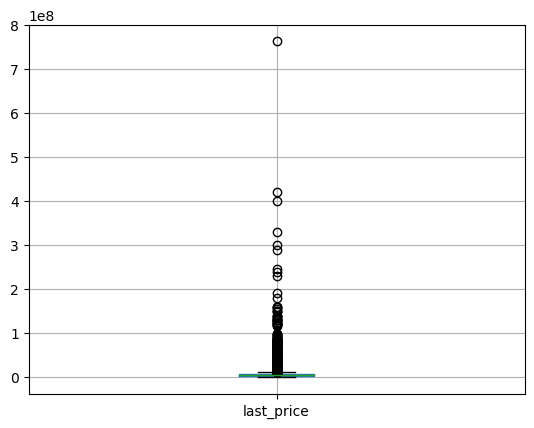

In [42]:
#Посторим диаграмму размаха по цене квартиры
data.boxplot('last_price');

На диаграмме видны аномальные значения.

In [43]:
#выведем цены квартир по убыванию
data.sort_values('last_price', ascending=False)['last_price'].head(20)

12897    763000000.0
19431    420000000.0
14621    401300000.0
1431     330000000.0
15565    300000000.0
22701    289238400.0
16372    245000000.0
13671    240000000.0
5863     230000000.0
8857     190870000.0
19756    180000000.0
19048    160000000.0
2527     159984000.0
16406    159000000.0
1022     155000000.0
7817     150000000.0
14930    150000000.0
22104    148000000.0
12603    140000000.0
12787    140000000.0
Name: last_price, dtype: float64

In [44]:
#количество записей непреобразованной таблицы
data.shape[0]

23565

In [45]:
#перезапишем в таблицу значения, цена квартиры которых меньше 200000000
data = data[data['last_price'] < 200000000]

In [46]:
#количество записей преобразованной таблицы
data.shape[0]

23556

In [47]:
#процент исключенных записей менее 1%
(23565 - 23556) / 23565

0.00038192234245703374

#### Проведем анализ аномальных значений по количеству комнат

In [48]:
#рассмотрим количество записей для квартир на разных этажах
data['rooms'].value_counts()

1     8004
2     7896
3     5778
4     1172
5      324
0      194
6      101
7       57
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
Name: rooms, dtype: int64

In [49]:
#для квартир выше 7 этажа слишком маленькая выборка, исключим данные значеения
data = data[data['rooms'] < 7]

In [50]:
#количество записей преобразованной таблицы
data.shape[0]

23469

In [51]:
#процент исключенных записей менее 1%
(23556 - 23469) / 23556

0.0036933265410086604

#### Проведем анализ аномальных значений по общей площади квартиры

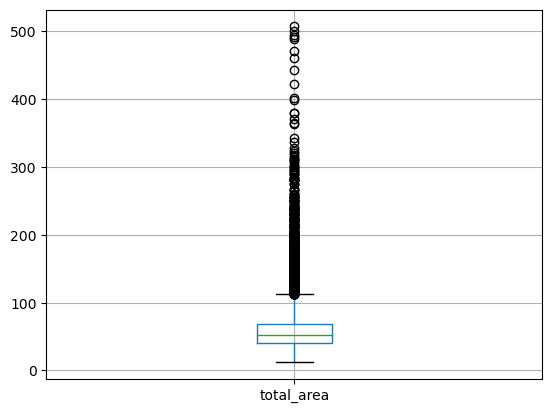

In [52]:
#Посторим диаграмму размаха
data.boxplot('total_area');

In [53]:
#выведем данные по общим площадям квартир по убыванию
data.sort_values('total_area', ascending=False)['total_area'].head(40)

7977     507.00
14930    500.00
9779     494.10
22368    491.00
6587     488.00
6188     470.30
20160    460.80
3660     441.98
22006    422.20
14009    402.00
1383     399.00
5017     380.00
7634     380.00
19284    371.00
19852    365.00
6150     363.10
20703    342.00
16090    336.00
14506    327.20
1081     323.00
11025    320.00
155      317.00
7624     315.00
9515     312.00
7898     312.00
789      310.00
1022     310.00
7505     307.80
2235     304.00
19114    301.90
7997     300.00
20802    300.00
22874    297.50
10128    295.00
15614    293.60
14931    293.60
1183     290.60
4515     290.00
22220    290.00
13065    288.00
Name: total_area, dtype: float64

In [54]:
#исключитм значения по площадям меньше 350 м2
data = data[data['total_area'] < 350.0]

In [55]:
#количество записей преобразованной таблицы
data.shape[0]

23453

In [56]:
#процент исключенных записей менее 1%
(23469 - 23453) / 23469

0.0006817503941369466

#### Итоги по результатам предобработки данных

In [57]:
#Проверим количество значений
data.shape

(23453, 22)

In [58]:
#Проверим количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5520
city_centers_nearest     5499
parks_around3000         5498
parks_nearest           15503
ponds_around3000         5498
ponds_nearest           14487
days_exposition          3137
dtype: int64

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23453 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23453 non-null  int64  
 1   last_price            23453 non-null  float64
 2   total_area            23453 non-null  float64
 3   first_day_exposition  23453 non-null  object 
 4   rooms                 23453 non-null  int64  
 5   ceiling_height        23453 non-null  float64
 6   floors_total          23453 non-null  int32  
 7   living_area           23453 non-null  float64
 8   floor                 23453 non-null  int64  
 9   is_apartment          23453 non-null  bool   
 10  studio                23453 non-null  bool   
 11  open_plan             23453 non-null  bool   
 12  kitchen_area          23453 non-null  float64
 13  balcony               23453 non-null  int32  
 14  locality_name         23453 non-null  object 
 15  airports_nearest   

После преобразований, количество трок сократилось на 246 строк
- с 23699 строк
- до 23453 строк

По полученной информации можно сказать

- is_apartment преобразован в тип bool

- floors_total преобразован в int64 

- balcony преобразован в тип int64 

- parks_around3000 - не преобразован, так как в столбце все еще присутствуют незаполненные данные, которые не могут быль заполнены числовыми значеними

- ponds_around3000 - не преобразован, так как в столбце все еще присутствуют незаполненные данные, которые не могут быль заполнены числовыми значеними

- days_exposition - не преобразован, так как в столбце все еще присутствуют незаполненные данные, которые не могут быль заполнены числовыми значеними

### Посчитайте и добавьте в таблицу новые столбцы

In [60]:
#Расситаем стоимость одного квадратного метра и 
#запишем данные в таблицу
data['price_metr'] = data['last_price'] / data['total_area']

In [61]:
#Запишем в таблицу день недели размещения объявления
#Так как время не указано, выведем только день публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['weekday'] = data['first_day_exposition'].dt.weekday

In [62]:
#Рассмотрим полученны данные
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.700,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,2.615,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.700,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3
3,0,64900000.0,159.0,2015-07-24,3,2.700,14,36.976588,9,False,False,False,27.303829,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4
4,2,10000000.0,100.0,2018-06-19,2,3.030,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1


Проверим 2019-03-07 - четверг (3) расчет верен

In [63]:
#Запишем в таблицу месяц первого размещения
data['month'] = data['first_day_exposition'].dt.month

In [64]:
#Запишем в таблицу год первого размещения
data['year'] = data['first_day_exposition'].dt.year

In [65]:
#Категоризируем данные по размещению квартиры относительно всех этажей дома
def categorize_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == floors_total:
            return 'последний'
        elif floor == 1:
            return 'первый'
        elif 1 < floor < floors_total:
            return 'другой'
    except:
        pass

In [66]:
#Применим функцию к таблице и запишем категории для каждой строки
data['category_floor'] = data.apply(categorize_floor, axis=1)

In [67]:
#Переведем расстояние до центра из метров в километры
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [68]:
#Проверим данные
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday,month,year,category_floor,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.700,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.615,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.700,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.700,14,36.976588,9,False,False,False,27.303829,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.030,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


In [69]:
#Выведем основную информацию по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23453 entries, 0 to 23564
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23453 non-null  int64         
 1   last_price               23453 non-null  float64       
 2   total_area               23453 non-null  float64       
 3   first_day_exposition     23453 non-null  datetime64[ns]
 4   rooms                    23453 non-null  int64         
 5   ceiling_height           23453 non-null  float64       
 6   floors_total             23453 non-null  int32         
 7   living_area              23453 non-null  float64       
 8   floor                    23453 non-null  int64         
 9   is_apartment             23453 non-null  bool          
 10  studio                   23453 non-null  bool          
 11  open_plan                23453 non-null  bool          
 12  kitchen_area             23453 n

На основе данных были рассчитаны и добавлены следующие столбцы:

- price_metr - цена за квадратный метр
- weekday - день недели размещения объявления
- month - месяц размещения объявления
- year - год размещения объявления
- category_floor - категории этажей
- city_centers_nearest_km - удаленность от центра в км

### Проведите исследовательский анализ данных

#### Изучение параметров

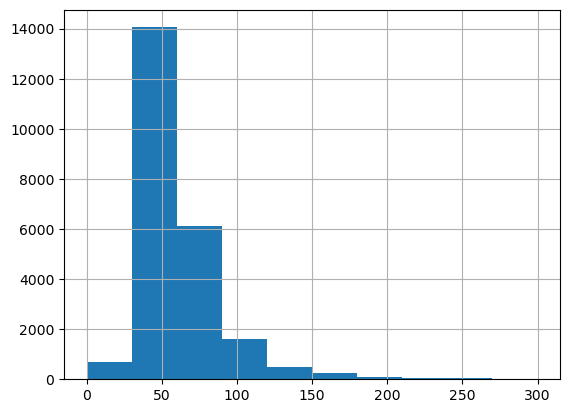

In [70]:
#Построекние гистограммы для общей площади
data['total_area'].hist(range=(0, 300));

По полученным данным можно сказать, что площадь квартиры подчинена распределению Пуассона. 
Чаще всего встречаются квартиры в промежутке от 45 до 75 метров квадратных.
При увеличении площади квартиры уменьшается количество предложений, что справедиво для промежутка от 75 м2.

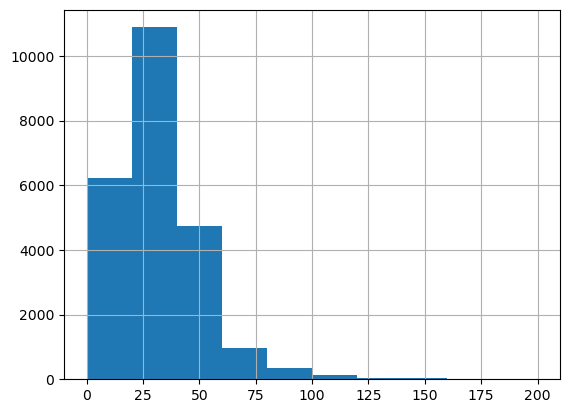

In [71]:
#Построекние гистограммы для жилой площади
data['living_area'].hist(range=(0, 200));

Жилая площадь квартиры подчинена распределению Пуассона. 
Чаще всего встречаются квартиры с жилой площадью в промежутке от 25 до 40 метров квадратных. При увеличении жилой площади квартиры уменьшается количество предложений, что справедиво для промежутка от 40 м2.

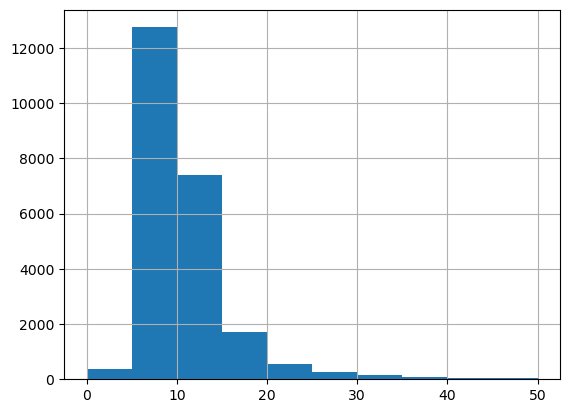

In [72]:
#Построекние гистограммы для площади кухни
data['kitchen_area'].hist(range=(0, 50));

Площадь кухни, также как и полщади других территорий квартиры, подчинена распределению Пуассона. Чаще всего встречаются квартиры с площадью кухни в промежутке от 8 до 10 метров квадратных. При увеличении площади кухни уменьшается количество предложений, что справедиво для промежутка от 10 м2.

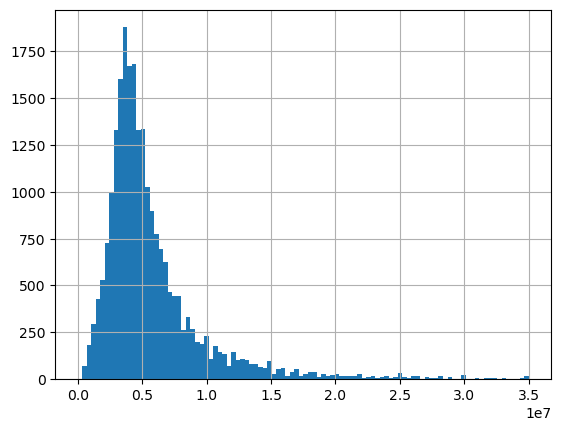

In [73]:
#Построекние гистограммы по цене
data['last_price'].hist(range=(0, 35000000), bins=100);

Чаще всего в представленных данных встречается цена на квартиры от 3 до 4 млн.р. При дальнейшем увеличении цены предложение резко уменьшается.

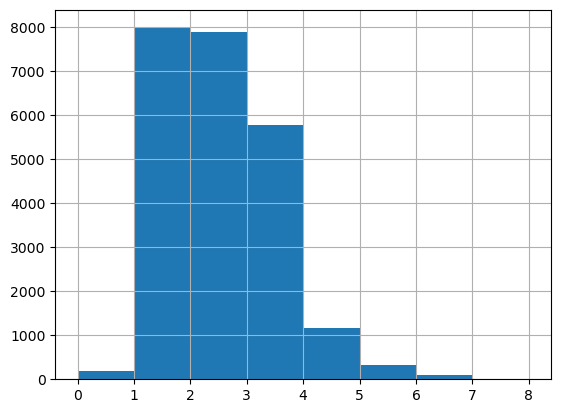

In [74]:
#Построекние гистограммы по количеству комнат
data['rooms'].hist(range=(0, 8), bins=8);

По полученным данным можно сказать, чаще всего встречаются квартиры с 1-3 комнатами. При увеличении количества комнат в квартире уменьшается количество предложений.

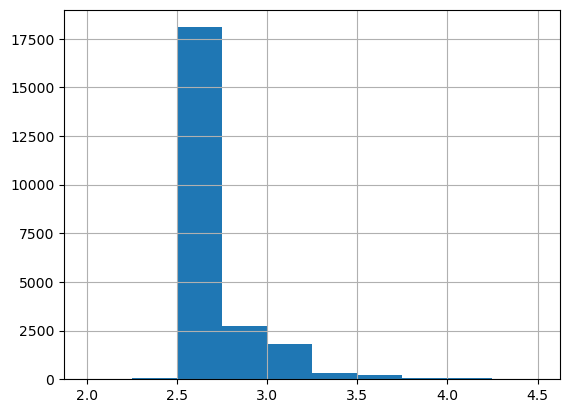

In [75]:
#Построекние гистограммы по высоте потолков
data['ceiling_height'].hist(range=(2, 4.5));

Чаще всего в предложениях встречаются квартиры с высотой потолка от 2,5 до 2,75 метров. Что соответствует данным санпина.

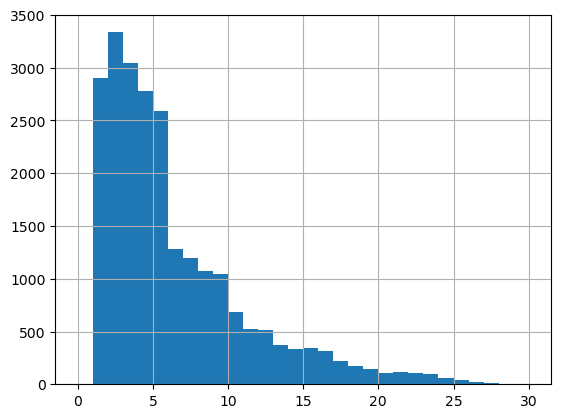

In [76]:
#Построекние гистограммы по этажу квартиры
data['floor'].hist(range=(0, 30), bins=30);

По данным можно сделать вывод, что чаще всего продают квартиры первых этажей. Также по графику видно резкое снижение предложений на квартиры, находящиеся выше 5 этажа. Данный факт может быть результатом большого количества небольших городов, представленных в выборке, в которых не часто распространены здания выше 5 этажей.

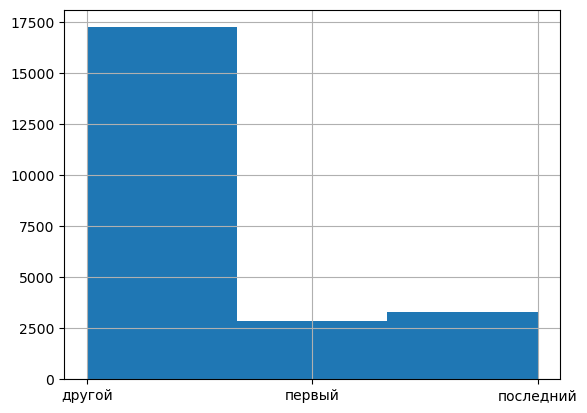

In [77]:
#Построекние гистограммы по категории этажей
data['category_floor'].hist(bins=3);

По данным графика можно отметить, что чаще всего продаются квартиры находящиеся не на первом, и не на последнем этажах. Возможными причинами могут быть бытовые факторы.

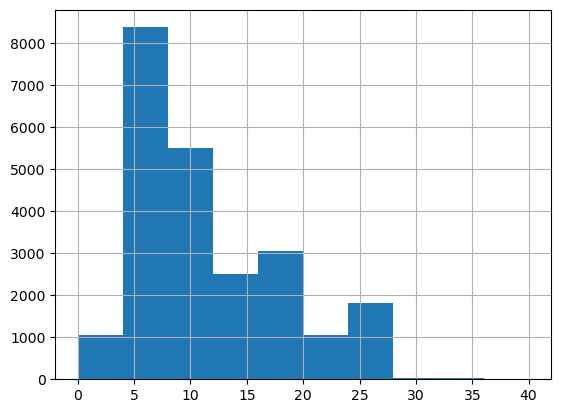

In [78]:
#Построекние гистограммы по количеству этаженй дома
data['floors_total'].hist(range=(0, 40));

В выборке чаще всего встречались здания по 5 этажей и меньше всего зданий высотой от 30 этажей, которые присущи большим городам.

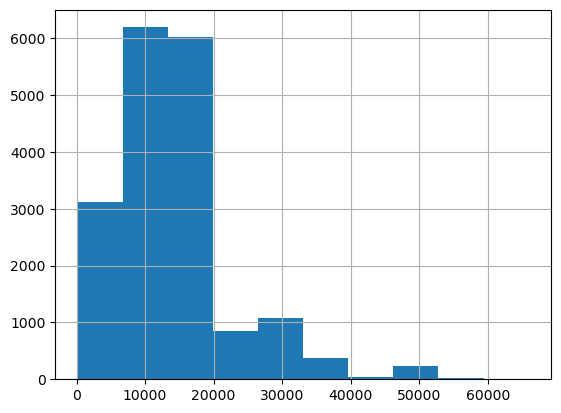

In [79]:
#Построекние гистограммы по удаленности от центра
data['city_centers_nearest'].hist();

Большую часть предложений составляют квартиры, которые отдалены от центра более чем на 10-20 км, по мере удаления предложение снижается.

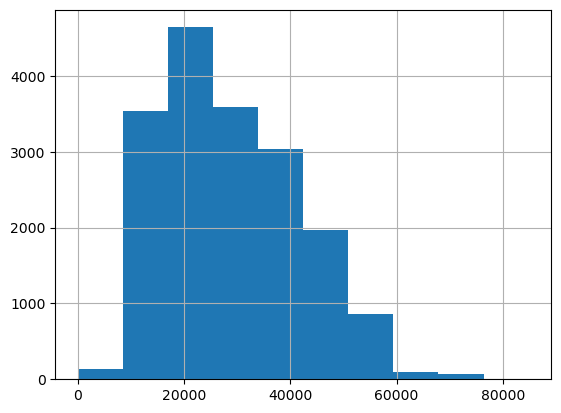

In [80]:
#Построекние гистограммы по расстоянию до аэропорта
data['airports_nearest'].hist();

Чаще всего продаются квартиры отдаленные от аэропорта на расстояние 20-25км.

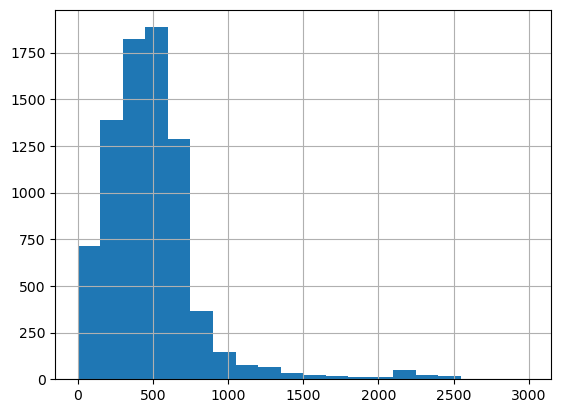

In [81]:
#Построекние гистограммы по расстоянию до парка
data['parks_nearest'].hist(range=(0, 3000), bins=20);

Для представленных в выборке квартир распространена характеристика - отдаленность от парка 400-600 метров.

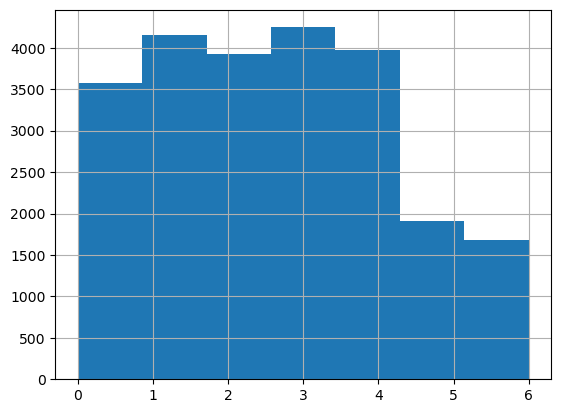

In [82]:
#Построекние гистограммы по дням недели регистрации объявления
data['weekday'].hist(bins=7);

Квартиры чаще всего выставляются на продажу в течение рабочей недели. Причиной этого может быть большой процент таких  пользователей, как агенства недвижимости.

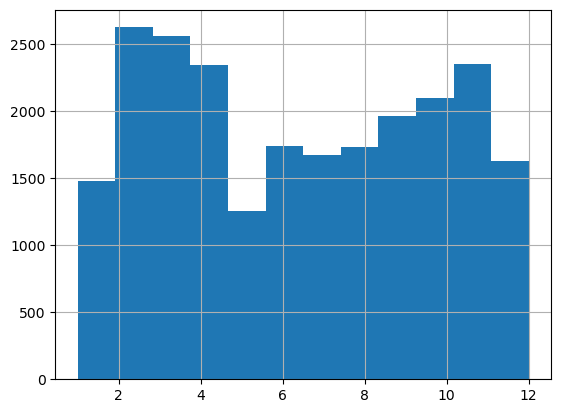

In [83]:
#Построекние гистограммы по месяцам регистрации объявления
data['month'].hist(bins=12);

Большая активность пользователей наблюдается в периоды с февраля по май и с июня по ноябрь, в месяцах: май, декабрь и январь отмечается спад активности, возможной причиной могут быть праздничные дни.

#### Анализ графы days_exposition

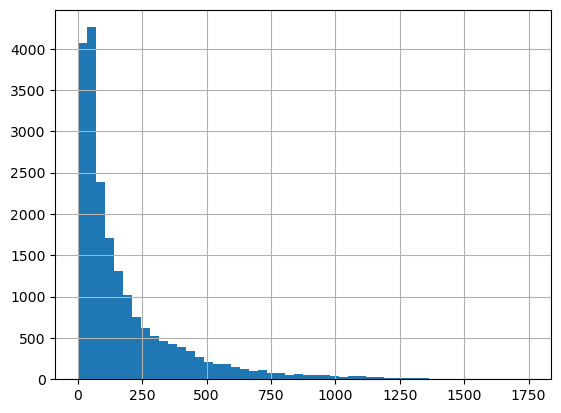

In [84]:
#Построекние гистограммы по количеству дней активности объявления
data['days_exposition'].hist(range=(0, 1750), bins=50);

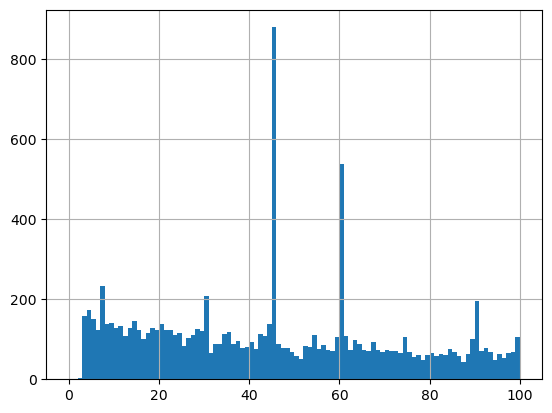

In [85]:
#Построекние гистограммы по количеству дней активности объявления
data['days_exposition'].hist(range=(0, 100), bins=100);

На графике за 100 дней ярко выражены пики активности, по приблизительным подсчетам, частота повторений  данных периодов активности равна 1-2 неделям.

In [86]:
#Выведем описание для данной графы
data['days_exposition'].describe()

count    20316.000000
mean       180.380685
std        219.328653
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Как мы можем заметить: 
- среднее количество дней составило 180.380685
- медианное количество дней 95.000000

Можно сделать вывод, что для анализируемой выборки характерно нестабильное время активности объявления. Наблюдается большое среднеквадратическое отклонение, равное 219.328653.
Причиной может служить большой разброс по населенным пунктам, с разной степенью удаленности от административных центров и с разным количеством жителей.

- Самая быстрая сделака состоялась через 1 день.
- Квартира находившаяся на продаже дольше всего не покупалась 1580 дней. 

#### Анализ зависимости общей стоимости объекта от разных факторов

##### Анализ зависимости общей стоимости объекта от общей площади квартиры

In [87]:
#отношение общей стоимости к общей площади квартиры
data_pivot_total_area = (
    data
    .pivot_table(index=(data['total_area']), values='last_price', aggfunc='median')
    .reset_index()
)
display(data_pivot_total_area.sort_values('total_area', ascending=False))

,total_area,last_price
2086,342.0,73900000.0
2085,336.0,28000000.0
2084,327.2,29000000.0
2083,323.0,75000000.0
2082,320.0,14000000.0
...,...,...
4,15.0,1725000.0
3,14.0,1190000.0
2,13.2,1686000.0
1,13.0,1850000.0


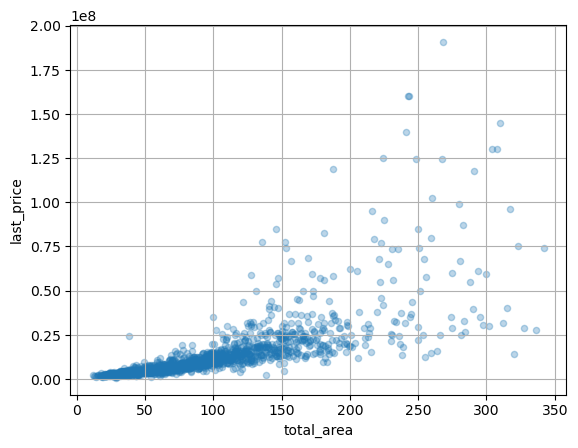

In [88]:
#построим диаграмму рассеяния
data_pivot_total_area.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha=0.3);

In [89]:
#рассчитаем коэффициент корреляции
data_pivot_total_area['last_price'].corr(data_pivot_total_area['total_area'])

0.7443058986068821

Согласно полученным данным наблюдается прямая зависимость между общей стоимостью и общей площадью квартиры. Об этом свидетельствует положение точек на графике, которые в свою очередь образуют размытую восходящую линию. Также коэффициент корреляции (74%) свидетельствует о достаточно сильной линейной зависимости. 

##### Анализ зависимости общей стоимости объекта от жилой площади квартиры

In [90]:
#отношение общей стоимости к жилой площади квартиры
data_pivot_living_area = (
    data
    .pivot_table(index=(data['living_area']), values='last_price', aggfunc='median')
    .reset_index()
)
display(data_pivot_living_area.sort_values('living_area', ascending=False))

,living_area,last_price
1826,255.700000,75000000.0
1825,250.000000,109000000.0
1824,229.825067,11000000.0
1823,200.000000,45011500.0
1822,194.000000,39000000.0
...,...,...
4,6.000000,3799000.0
3,5.400000,6100000.0
2,5.000000,2680000.0
1,3.000000,34715000.0


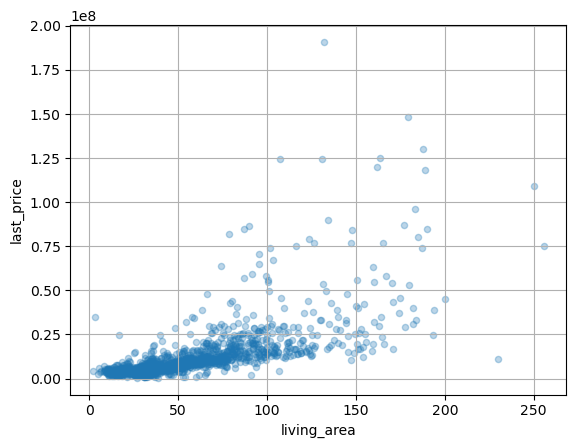

In [91]:
#построим диаграмму рассеяния
data_pivot_living_area.plot(x='living_area', y='last_price', kind='scatter', grid=True, alpha=0.3);

In [92]:
#рассчитаем коэффициент корреляции
data_pivot_living_area['last_price'].corr(data_pivot_living_area['living_area'])

0.699149791319811

Согласно полученным данным наблюдается умеренная зависимость между общей стоимостью и жилой площадью квартиры. Точки на диаграмме рассеяны в большей степени, чем в предыдущей зависимости.
Коэффициент корреляции (69%) свидетельствует о умеренной линейной зависимости. Данное соотношение говорит о том, что имеются сторонние факторы влияющие на переменные.

##### Анализ зависимости общей стоимости объекта от площади кухни

In [93]:
#отношение общей стоимости к площади кухни квартиры
data_pivot_kitchen_area = (
    data
    .pivot_table(index=(data['kitchen_area']), values='last_price', aggfunc='median')
    .reset_index()
)
display(data_pivot_kitchen_area.sort_values('kitchen_area', ascending=False))

,kitchen_area,last_price
2225,107.000000,85000000.0
2224,100.700000,12500000.0
2223,93.200000,82400000.0
2222,93.000000,65850000.0
2221,87.200000,56844500.0
...,...,...
4,2.232389,1850000.0
3,2.060666,2400000.0
2,2.000000,2720000.0
1,1.300000,4250000.0


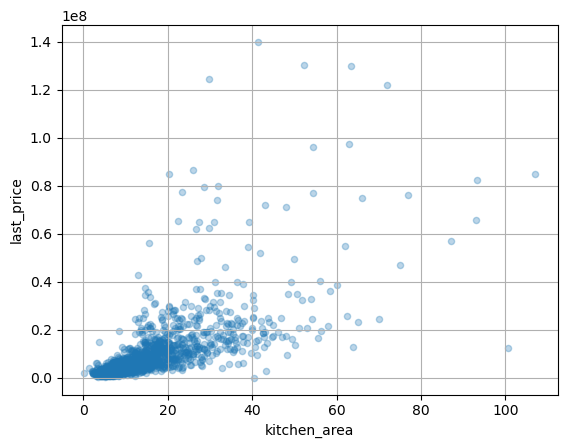

In [94]:
#построим диаграмму рассеяния
data_pivot_kitchen_area.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, alpha=0.3);

In [95]:
#рассчитаем коэффициент корреляции
data_pivot_kitchen_area['last_price'].corr(data_pivot_kitchen_area['kitchen_area'])

0.6957968319490551

Данные взаимосвязи площади кухни и общей стоимости квартиры аналогичны отношению жилой площади и общей стоимости квартиры. На диаграмме наблюдается большая степень рассеивания данных с увеличением площади кухни. Коэффициент корреляции (70%) свидетельствует о сильной линейной зависимости.

##### Анализ зависимости общей стоимости объекта от количества комнат квартиры

In [96]:
#отношение общей стоимости к количеству комнат квартиры
data_pivot_rooms = (
    data
    .pivot_table(index=(data['rooms']), values='last_price', aggfunc='median')
    .reset_index()
)
display(data_pivot_rooms.sort_values('rooms', ascending=False))

,rooms,last_price
6,6,18075000.0
5,5,13800000.0
4,4,9000000.0
3,3,6200000.0
2,2,4762338.0
1,1,3600000.0
0,0,2700000.0


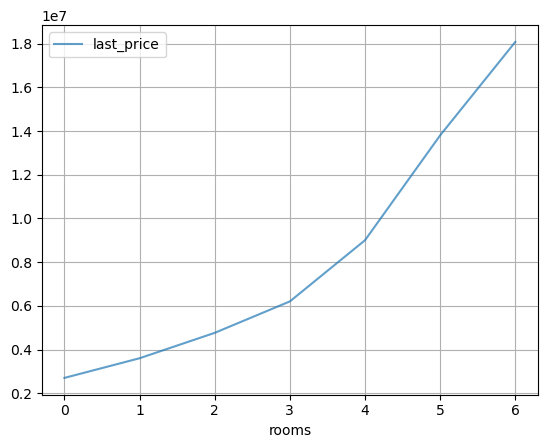

In [97]:
#построим диаграмму
data_pivot_rooms.plot(x='rooms', y='last_price', grid=True, alpha=0.7);

In [98]:
#рассчитаем коэффициент корреляции
data_pivot_rooms['last_price'].corr(data_pivot_rooms['rooms'])

0.9535886651432626

Данные взаимосвязи количества комнат и общей стоимости на диаграмме представлены плавной возрастающей. Коэффициент корреляции (95%) свидетельствует о практически абсолютной линейной зависимости цены квартиры от количества комнат.

##### Анализ зависимости общей стоимости объекта от этажа

In [99]:
#отношение общей стоимости к этажу квартиры
data_pivot_category_floor = (
    data
    .pivot_table(index=(data['category_floor']), values='last_price', aggfunc='median')
    .reset_index()
)
display(data_pivot_category_floor.sort_values('category_floor', ascending=False))

,category_floor,last_price
2,последний,4287500.0
1,первый,3900000.0
0,другой,4800000.0


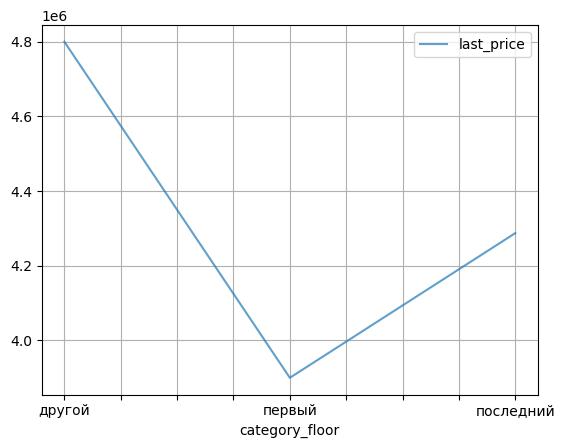

In [100]:
#построим диаграмму
data_pivot_category_floor.plot(x='category_floor', y='last_price', grid=True, alpha=0.7);

По полученным данным можно сделать вывод, что первые и последние этажи чаще всего имеют стоимоть ниже, чем квартиры на других этажах. Возможными причинами могут быть бытовые особенности.

##### Анализ зависимости общей стоимости объекта от дня недели размещения объявления

In [101]:
#отношение общей стоимости к дню недели размещения объявления
data_pivot_weekday = (
    data
    .pivot_table(index=(data['weekday']), values='last_price', aggfunc='median')
    .reset_index()
)
display(data_pivot_weekday.sort_values('weekday', ascending=False))

,weekday,last_price
6,6,4500000.0
5,5,4506000.0
4,4,4550000.0
3,3,4600000.0
2,2,4700000.0
1,1,4700000.0
0,0,4625000.0


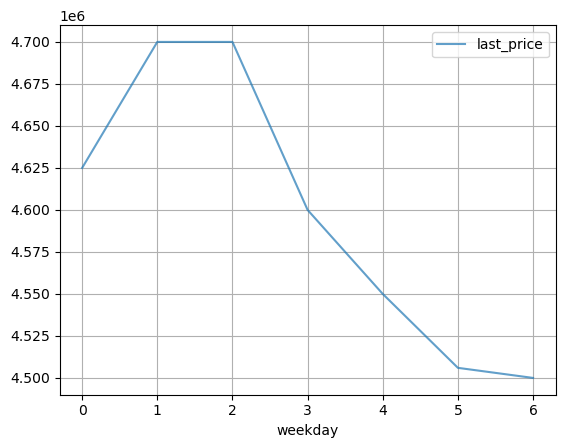

In [102]:
#построим диаграмму
data_pivot_weekday.plot(x='weekday', y='last_price', grid=True, alpha=0.7);

Согласно диаграмме стоимость квартиры выставлялась выше в рабочие дни, для выходных, стоимость квартир указывалась ниже. Возможной причиной может быть использование ресурса агентами по недвижимости.

##### Анализ зависимости общей стоимости объекта от месяца размещения объявления

In [103]:
#отношение общей стоимости к месяцу размещения объявления
data_pivot_month = (
    data
    .pivot_table(index=(data['month']), values='last_price', aggfunc='median')
    .reset_index()
)
display(data_pivot_month.sort_values('month', ascending=False))

,month,last_price
11,12,4680000.0
10,11,4699000.0
9,10,4550000.0
8,9,4700000.0
7,8,4550000.0
6,7,4600000.0
5,6,4400000.0
4,5,4500000.0
3,4,4800000.0
2,3,4640000.0


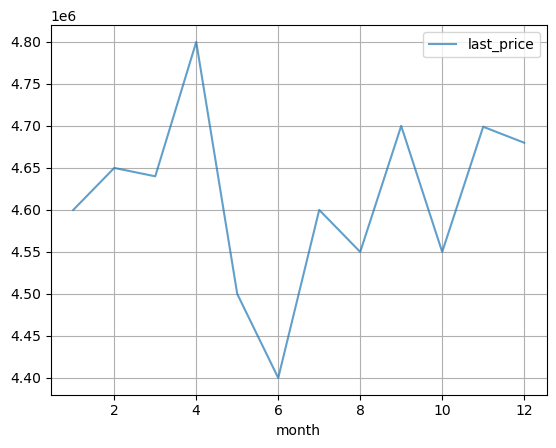

In [104]:
#построим диаграмму
data_pivot_month.plot(x='month', y='last_price', grid=True, alpha=0.7);

По полученным данным сделаем вывод, что общая стоимость квартиры слабо зависит от месяца регистрации объявления. Стоимость в данном случае зависит от сторонних факторов. 

##### Анализ зависимости общей стоимости объекта от года размещения объявления

In [105]:
#отношение общей стоимости к году размещения объявления
data_pivot_year = (
    data
    .pivot_table(index=(data['year']), values='last_price', aggfunc='median')
    .reset_index()
)
display(data_pivot_year.sort_values('year', ascending=False))

,year,last_price
5,2019,5000000.0
4,2018,4550000.0
3,2017,4500000.0
2,2016,4500000.0
1,2015,5300000.0
0,2014,7640000.0


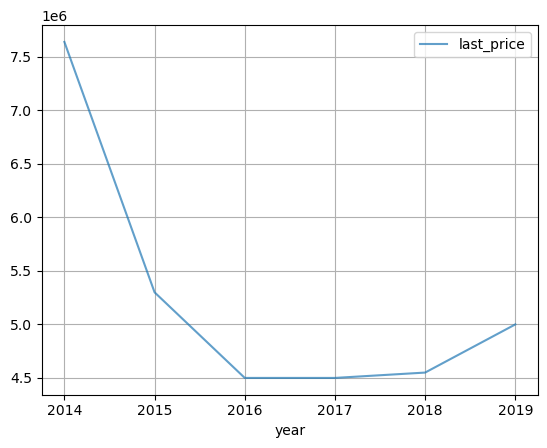

In [106]:
#построим диаграмму
data_pivot_year.plot(x='year', y='last_price', grid=True, alpha=0.7);

Согласно графику, стоимость квартир с 2014 года по 2017 падала, в 2017 году замечено восходящее движение графика. Возможной причиной могут быть сторонние факторы, такие как инфляция и ситуация в стране.

#### Анализ 10 населенных пунктов с наибольшим количеством объявлений

In [107]:
#Выведем 10 населенных пунктов с наибольшим количеством объявлений
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15543
Мурино                 586
посёлок Шушары         439
Всеволожск             398
Пушкин                 367
Колпино                337
посёлок Парголово      326
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [108]:
#Сохраним данные в DataFrame
good_data = data.loc[data['locality_name'].isin(['Санкт-Петербург', 'Мурино', 'посёлок Шушары', 'Всеволожск', 
                                'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг'])]

In [109]:
#Проверим полученную таблицу
good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday,month,year,category_floor,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.700,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.615,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.700,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.700,14,36.976588,9,False,False,False,27.303829,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.030,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


In [110]:
#Создадим выборку данных, отсортируем данные по уменьшению цены за кв.метр
data_pivot_price_metr = (
    good_data
    .pivot_table(index=(good_data['locality_name']), values='price_metr', aggfunc='median')
    .reset_index()
)
display(data_pivot_price_metr.sort_values('price_metr', ascending=False))

,locality_name,price_metr
6,Санкт-Петербург,104761.904762
5,Пушкин,100000.000000
7,деревня Кудрово,91860.465116
8,посёлок Парголово,91780.224134
4,Мурино,86250.377687
9,посёлок Шушары,76829.268293
3,Колпино,74722.222222
2,Гатчина,67796.610169
0,Всеволожск,65789.473684
1,Выборг,58158.319871


По полученным данным, самым дорогим по стоимости квадратного метра стал Санкт-Петербург, медианная стоимость составила  104761.90р.
Самым дешевым из представленных стал квадратный метр в Выборге, его стоимость составила 58158.32р.

#### Анализ зависимости расстояния от центра на стоимость квартиры

In [111]:
#Создадим DF для данных по Санкт-Петербургу
data_spb = data.loc[data['locality_name'] == 'Санкт-Петербург'].copy()
data_spb['center_km_price'] = ""

In [112]:
#Рассчитаем цену километра до центра
def def_center_km_price(row):
    city_centers_nearest_km = row['city_centers_nearest_km']
    center_km_price = row['center_km_price']
    last_price = row['last_price']
    try:
        center_km_price = last_price / city_centers_nearest_km
    except ZeroDivisionError:
        center_km_price = last_price
    return center_km_price

In [113]:
#Применим функцию к таблице и запишем категории для каждой строки
data_spb['center_km_price'] = data_spb.apply(def_center_km_price, axis=1)

In [114]:
#Выведем медианные значения по расстоянию до центра 
data_pivot_spb_median = (
    data_spb
    .pivot_table(index=['city_centers_nearest_km'], values='center_km_price', aggfunc='median')
    .reset_index()
)

display(data_pivot_spb_median)

,city_centers_nearest_km,center_km_price
0,0.0,1.590000e+07
1,1.0,1.100000e+07
2,2.0,4.950000e+06
3,3.0,2.766667e+06
4,4.0,2.250000e+06
5,5.0,1.840000e+06
6,6.0,1.436754e+06
7,7.0,1.114286e+06
8,8.0,9.250000e+05
9,9.0,5.888889e+05


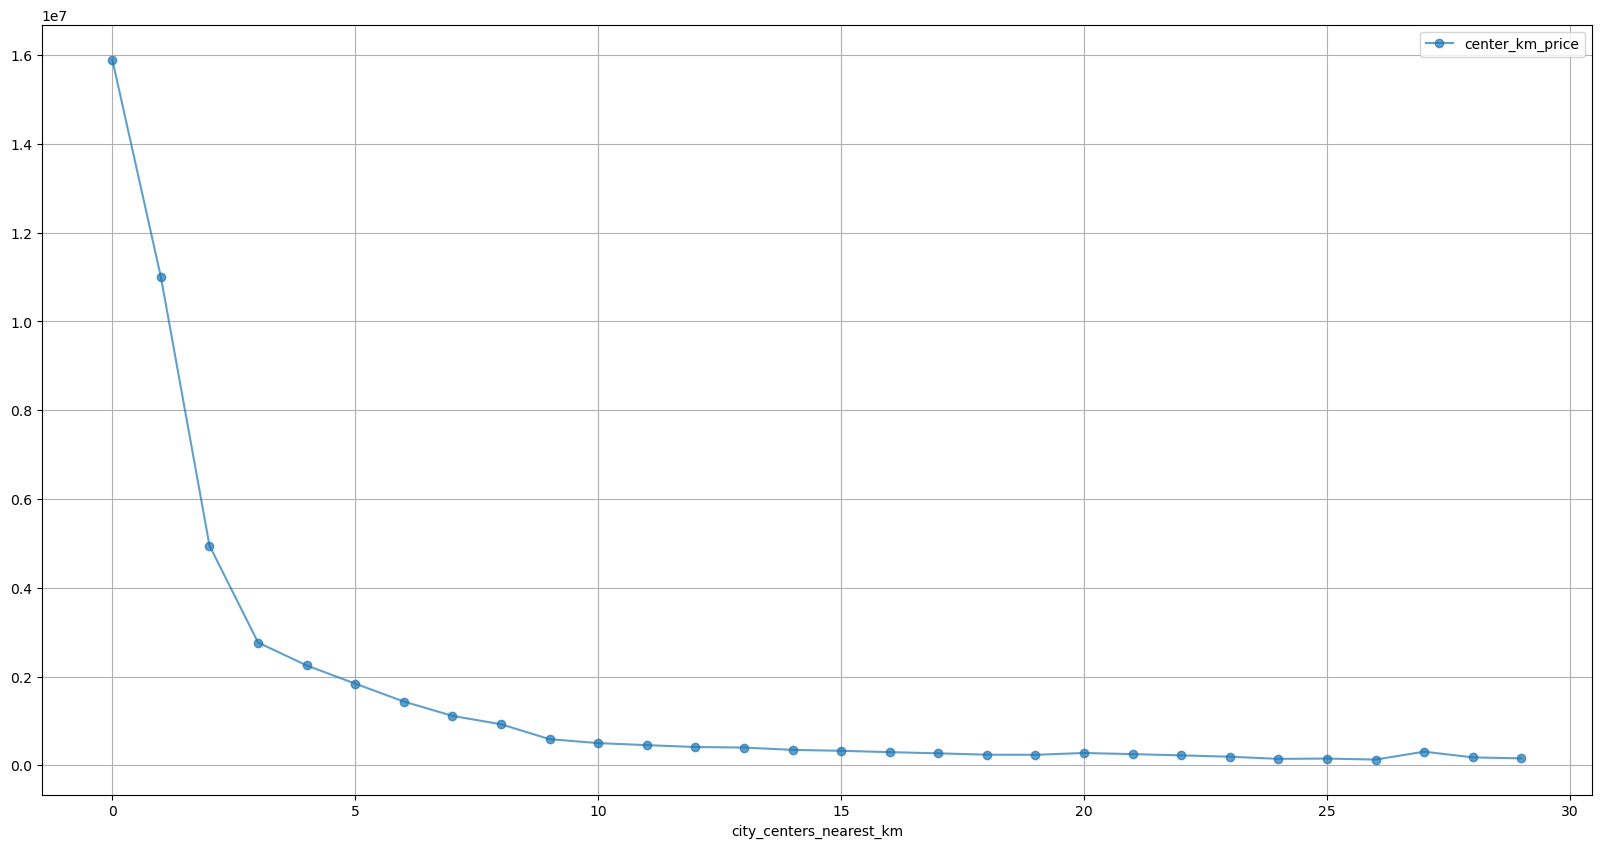

In [115]:
#Построим диаграмму рассеяния
data_pivot_spb_median.plot(x='city_centers_nearest_km', 
                           y='center_km_price',  
                           grid=True, 
                           alpha=0.7, 
                           figsize=(20, 10),
                           marker='o');

In [116]:
#Рассчитаем коэффициент корреляции
data_pivot_spb_median['city_centers_nearest_km'].corr(data_pivot_spb_median['center_km_price'])

-0.5998627691785315

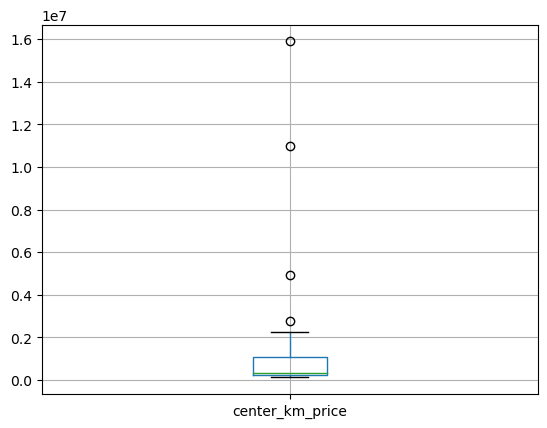

In [117]:
#Посторим диаграмму размаха
data_pivot_spb_median.boxplot('center_km_price');

In [118]:
#Выведем средние значения по расстоянию до центра 
data_pivot_spb_mean = (
    data_spb
    .pivot_table(index=['city_centers_nearest_km'], values='center_km_price', aggfunc='mean')
    .reset_index()
)
display(data_pivot_spb_mean)

,city_centers_nearest_km,center_km_price
0,0.0,3.148177e+07
1,1.0,1.739684e+07
2,2.0,8.090729e+06
3,3.0,3.509657e+06
4,4.0,2.939887e+06
5,5.0,2.544831e+06
6,6.0,2.319310e+06
7,7.0,2.072826e+06
8,8.0,1.141449e+06
9,9.0,7.729537e+05


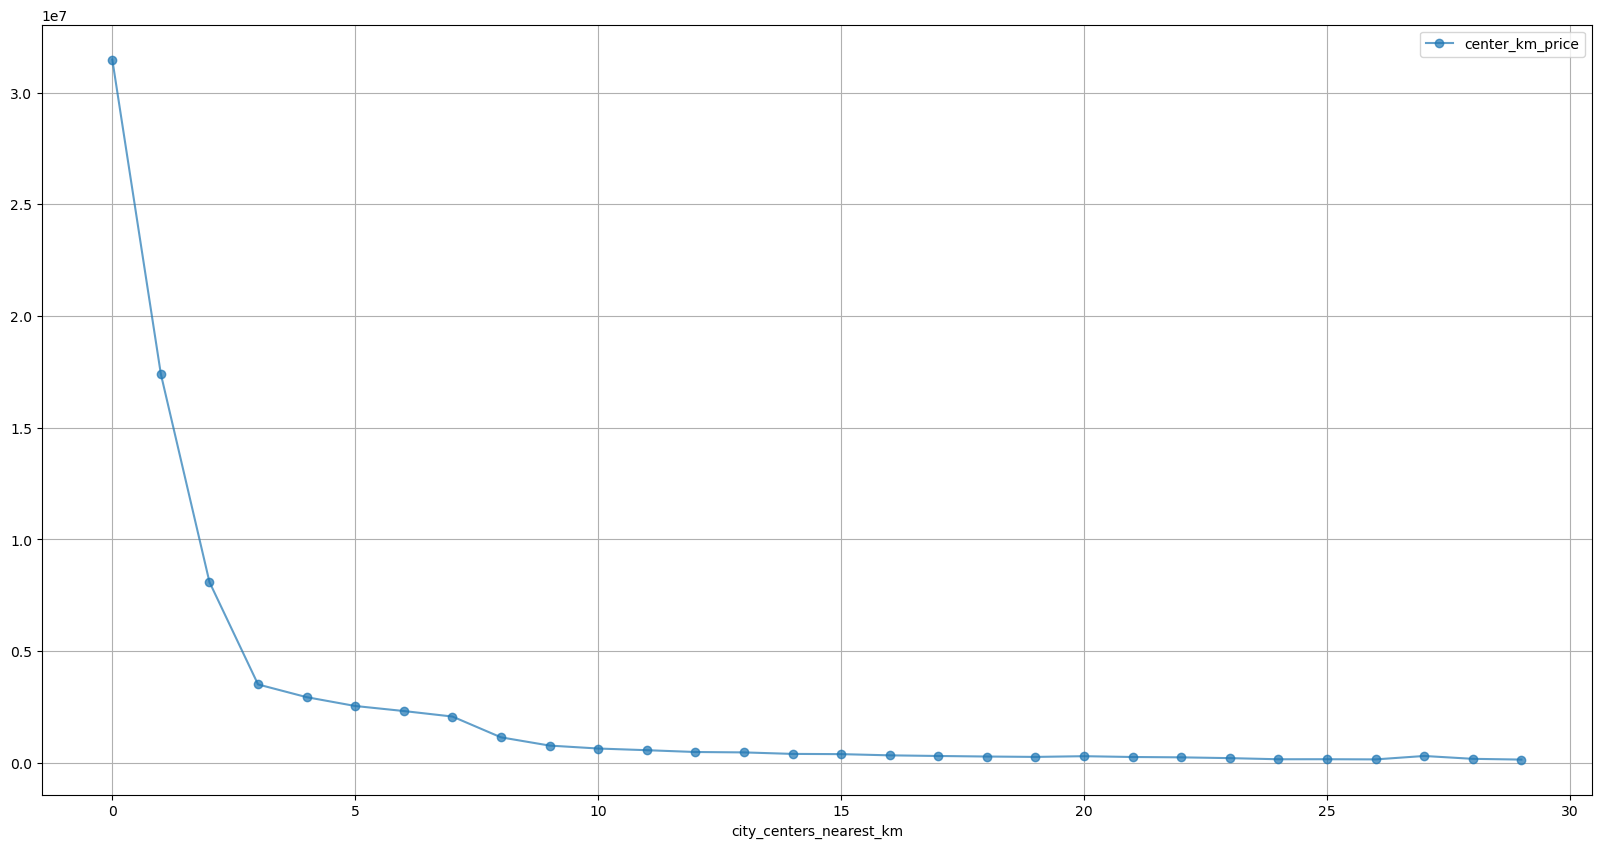

In [119]:
#Построим диаграмму рассеяния
data_pivot_spb_mean.plot(x='city_centers_nearest_km', 
                         y='center_km_price', 
                         grid=True, 
                         alpha=0.7, 
                         figsize=(20, 10),
                         marker='o');

In [120]:
#Рассчитаем коэффициент корреляции
data_pivot_spb_mean['city_centers_nearest_km'].corr(data_pivot_spb_mean['center_km_price'])

-0.560031243025216

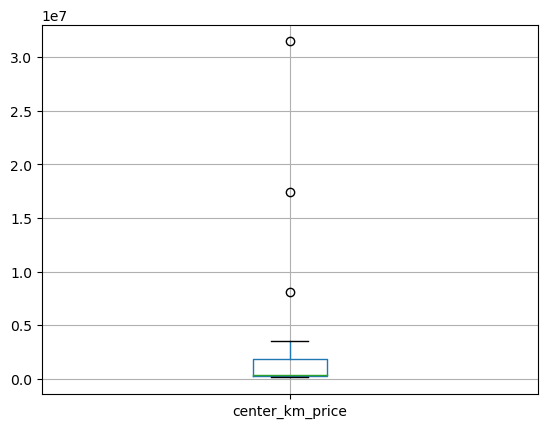

In [121]:
#Посторим диаграмму размаха
data_pivot_spb_mean.boxplot('center_km_price');

По данным представленным на диаграммах можно сказать, что вид данной зависимости обратный, так как на графике можно рассмотреть убывающую гиперболу. На диаграмме видно, что при приближении к нулю по оси Х, цена для большинства квартир возрастает в несколько раз. То есть наблюдается обратно пропорциональная зависимость. Коэффициент корреляции показывает умеренную зависимость. 
Сренее и медианное значения имеют небольшое отклонение друг от друга в масштабах выборки.

Можно сделать вывод, что удаленность от центра является одним из значительных факторов, в совокупности с другими, влияющими на стоимость квартиры.

### Общий вывод

В результате проведенного анализа, были выполнеы следующие этапы:
- предобработка данных (были выявлены дубликаты, удалены и заполнены пустые значения, выявлены и исправлены аномалии)
- на основе обработанных данных были добавлены необходимые для дальнейшего анализа графы
- был проведен анализ как данных по отдельности, так и в совокупности

По отдельности на гистограммах можно было проследить, что все количественные параметры подчиняются закону растределения Пуассона.

По результатам анализа отношений различных факторов к цене квартиры можно утверждать следующее: 

1. цена прямо пропорциональна площади квартиры, также как площади отдельных частей квартиры

Коэффициент коррекляции составляет 74% для зависимости цены квартиры от общей площади, что свидетельствует о достаточно сильной линейной зависимости.

2. цена прямо пропорциональна количеству комнат

Коэффициент корреляции составил 95%, что свидетельствует о практически абсолютной линейной зависимости.

3. цена напрямую зависит от этажа, на котором находится

Первые и последние этажи чаще всего имеют стоимоть ниже, чем квартиры на других этажах. Возможными причинами могут быть бытовые особенности.

4. цена на квартиру указывается выше в будние дни

Согласно диаграмме стоимость квартиры выставлялась выше в рабочие дни, для выходных, стоимость квартир граничит с нижним порогом. Возможной причиной может быть использование ресурса агентами по недвижимости.

5.  цена слабо взаимосвязана с месяцем, в который было размещено объявление 

Общая стоимость квартиры слабо зависит от месяца регистрации объявления. Стоимость в данном случае зависит от сторонних факторов.

6. цена на квартиры с 2017 года начла расти

Стоимость квартир с 2014 года по 2017 уменьшалась, в 2017 году замечено восходящее движение графика. Возможной причиной могут быть сторонние факторы, такие как инфляция и ситуация в стране.

7. цена обратно пропорциональна расстоянию до центра населенного пункта

Ближе к центру наблюдаются аномально высокие цены на недвижимость. Коэффициент корреляции составил -60%. Возможные причины близость культурного центра, близость располоения необходимых инстанций.

Из полученых результатов можно заключить, что на формирование цены на рынке недвижимости влияют различные факторы в совокупности, начиная от количественных  характеристик до картографических данных. Для выявления более точных возможных факторов ценообразования необходимо проводить точечный анализ требуемых величин.